<a href="https://colab.research.google.com/github/Nikhildongare123/movie-data-analysis-/blob/main/movie_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) What is the most frequent genre of movies relesed no netflix?
# 2) What has highest votes in vote avg column ?
# 3) What movie got the highest popularity? what is genre?
# 4) What movie got the lowest popularity ? what its genre?
# 5) What year has the most filmmed movies ?

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [143]:
df = pd.read_csv("/content/mymoviedb.csv",lineterminator='\n')


In [144]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [146]:
df.isnull().sum()

,0
Release_Date,0
Title,0
Overview,0
Popularity,0
Vote_Count,0
Vote_Average,0
Original_Language,0
Genre,0
Poster_Url,0


In [147]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [148]:
df.duplicated().sum()

np.int64(0)

In [149]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


** Exploration summary


* we have a dataframae consisting of 9827 rows and 9 colums.
* our dataset looks a bit tidy with no naws nor duplicated values.
* release_data column need to be casted into data time and to extract only the year value.
* overview, original_languege and poster_url wonldn't be so useful during analysis, so we 'll drop them
* there is noticable outliers in popularity column
* vote_averge batter be categorised for proper analysis
* genre column has coma saperated value and white space than needs to be handlid and casted into catagory exploration summary

In [150]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [151]:
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date'].dtype

dtype('int32')

In [152]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [153]:
#dropping the columns

cols = ['Overview','Original_Language','Poster_Url']
df.drop(cols,axis=1,inplace=True, errors='ignore')

In [154]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [155]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


# categorizing Vote_Average column
* we would cut the vote_average value and make 4 categories : Popular , average , below_avg , not_popular to describe to more using catigorize_col() function provided above

In [156]:
df.columns


Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [157]:


def catigorize_col(df, col, labels):
    edges = [
        df[col].min(),
        df[col].quantile(0.25),
        df[col].quantile(0.50),
        df[col].quantile(0.75),
        df[col].max()
    ]
    df[col] = pd.cut(df[col], edges, labels=labels, include_lowest=True)
    return df

labels = ['not_popular','below_avg','average','popular']
df = catigorize_col(df, 'Vote_Average', labels)

df['Vote_Average'].unique()


['popular', 'below_avg', 'average', 'not_popular']
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [158]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [159]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
not_popular,2567
popular,2450
average,2412
below_avg,2398


In [160]:
df.dropna(inplace=True)
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


* we d split genres into a list and then explode our dataframe to have only one genre per row for ezch movie

In [161]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [162]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
1,2022,The Batman,3827.658,1151,popular,Crime
1,2022,The Batman,3827.658,1151,popular,Mystery


In [163]:
# Casting column into cateogy
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25793 entries, 0 to 9826
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25793 non-null  category
 5   Genre         25793 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 958.1+ KB


In [165]:
df.nunique()

,0
Release_Date,102
Title,9513
Popularity,8160
Vote_Count,3266
Vote_Average,4
Genre,19


In [166]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
1,2022,The Batman,3827.658,1151,popular,Crime
1,2022,The Batman,3827.658,1151,popular,Mystery


## Data Visualization

In [167]:
sns.set_style('whitegrid')

1) What is the most frequent genre of movies relesed no netflix?

In [168]:
df['Genre'].describe()

,Genre
count,25793
unique,19
top,Drama
freq,3744


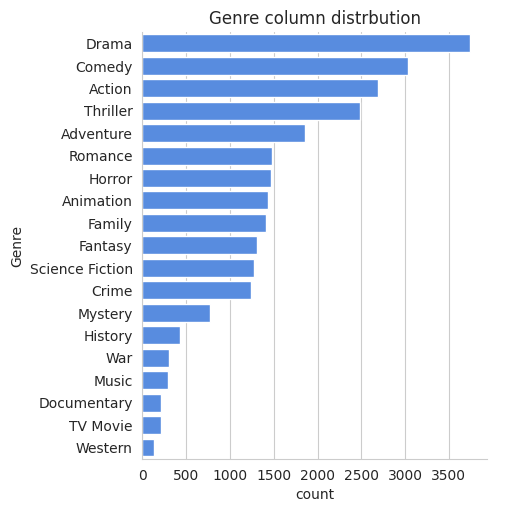

In [169]:
sns.catplot(y= 'Genre', data = df, kind= 'count',
            order = df['Genre'].value_counts().index,
            color=  '#4287f5')
plt.title('Genre column distrbution')
plt.show()

2) What has highest votes in vote avg column ?

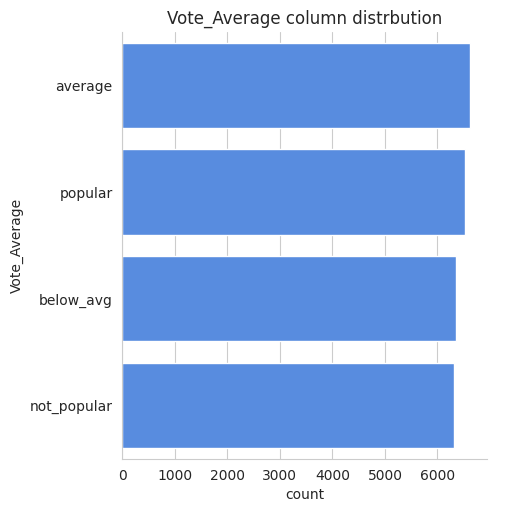

In [170]:
sns.catplot(y = 'Vote_Average',data = df,kind = 'count',
            order = df['Vote_Average'].value_counts().index
            ,color = '#4287f5')
plt.title('Vote_Average column distrbution')
plt.show()

3) What movie got the highest popularity? what is genre?

In [173]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


4) What movie got the lowest popularity ? what its genre?

In [174]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
9825,2021,The United States vs. Billie Holiday,13.354,152,average,Music
9825,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
9825,2021,The United States vs. Billie Holiday,13.354,152,average,History
9826,1984,Threads,13.354,186,popular,War
9826,1984,Threads,13.354,186,popular,Drama
9826,1984,Threads,13.354,186,popular,Science Fiction


5) What year has the most filmmed movies ?

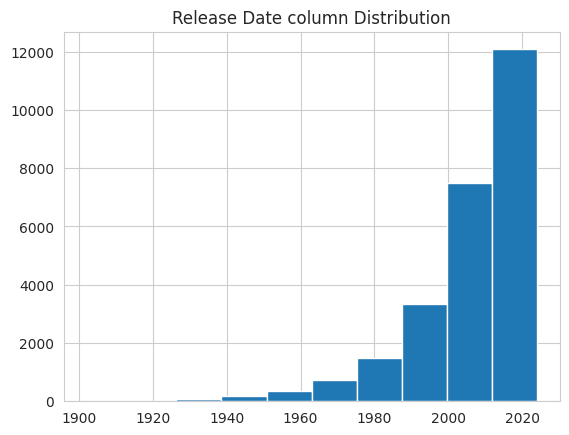

In [175]:
df['Release_Date'].hist()
plt.title("Release Date column Distribution")
plt.show()